# Script 6 - Constrained Ordination

# Librairies

In [ ]:
library(vegan)

# Loading data and removing empty site 8

<div style="padding: 10px; border:1px solid green; font-size: 10px;">
  <span style="font-size: 15px;"> <i>Loading the data from Doubs</i> </span><br/>
</div>

In [ ]:
# Load the Doubs data
load("Doubs.RData")
# Remove empty site 8
spe <- spe[-8, ]
env <- env[-8, ]
spa <- spa[-8, ]

<div style="padding: 10px; border:1px solid green; font-size: 10px;">
  <span style="font-size: 15px;"> <i>Loading the data from Doubs with a <strong>modified</strong> <strong><code>env</code></strong> dataset using qualitative slope factor (<strong><code>env3</code></strong>) and 2 subsets of explanatory variables (<strong><code>envchem</code></strong>,<strong><code>envtopo</code></strong>)</i> </span><br/>
</div>

In [ ]:
# Load the Modified Doubs data
load("DoubsModified.Rdata")

# Loading modified Doubs data 

# 1 Detrended Correspondence Analysis (DCA) -> *rda(),decorana()*

<div style="padding: 10px; border:5px solid green; font-size: 10px; text-align: center;">
    <img src="images/Script6_DCA.png" width="65%" >
</div>

<div style="padding: 10px; border:1px solid red; font-size: 18px; position: relative;">
  <span style="text-decoration:underline; font-weight: bold; font-size: 22px;">Question 1</span><br/>

  <div style="display: flex; align-items: flex-start;">
    <div style="flex: 1;">
        What are the ordinations methods maily affected by the horseshoe/arch effect ? <br/>
    </div>
  </div>

<form>
  <label><input type="radio" name="q5" value="1"> 1) PCA </label><br/>
  <label><input type="radio" name="q5" value="2"> 2) CA</label><br/>
  <label><input type="radio" name="q5" value="2"> 3) NMDS </label><br/>
  <label><input type="radio" name="q5" value="2"> 4) All these methods </label><br/>
</form>

</div>

<details style="font-size: 18px;">
  <summary style="font-size: 20px; font-weight: bold; text-decoration: underline;">Answer</summary>
  <div style="padding: 10px; border:1px solid blue; font-size: 20px;">

<form>
  <label style="color: blue;"><input type="radio" name="q5" value="squaring"> 1) PCA </label><br/>
  <label style="color: blue;"><input type="radio" name="q5" value="squaring"> 2)  CA</label><br/>
  <label><input type="radio" name="q5" value="2"> 3) NMDS </label><br/>
  <label><input type="radio" name="q5" value="2"> 4) All these methods </label><br/>

</form>



  </div>
</details>



### 1.0.1 DCA computation based on a dataframe → ***decorana**( df, iweigh=, iresc=, ira=, mk=, short=, before=, after=)*

*Detrended Correspondence Analysis (DCA) computation based on a dataframe*

- **`df`** → *Dataframe on which the DCA is computed (usually species abundance data)*  
- **`iweigh`** → *Downweighting of rare species.*  
  - `0`: no down-weighting (default)  
  - `1`: down-weight rare species  
- **`iresc`** → *Number of rescaling cycles*  
  - `0`: no rescaling  
- **`ira`** → *Type of analysis*  
  - `0`: detrended  
  - `1`: basic reciprocal averaging  
- **`mk`** → *Number of segments in rescaling.*  
- **`short`** → *Shortest gradient to be rescaled.*  
  - `0`: no shortening (default)  
  - `1`: shortening applied  
- **`before`** → *Hill's piecewise transformation: values before transformation.*  
- **`after`** → *Hill's piecewise transformation: values after transformation -- these must correspond to values in before*

  
**outputs** :
- **`Total inertia (scaled Chi-square)`**:  *The total variance in the dataset measured as the scaled Chi-square statistic*
- **`Eigen Values`**: *Values indicating the amount of variation explained by each PCA axis*
- **`Additive Eigen Values`**: * Values indicating the amount of variation explained by each DCA axis*
- **`Decorana Values`**: *Special scores computed during the detrending process, used to correct the arch effect and improve ecological interpretability.*
- **`Axis Length`**: *Length of each DCA axis expressed in standard deviation units; longer axes indicate stronger species turnover along that gradient.*


## 1.1 Demonstrating DCA over PCA Using the `varespec` Dataset

### 1.1.1 Load and the display the `varespec` Dataset

In [ ]:
# Loads the 'varespec' dataset from the vegan package. It contains species abundances from vegetation samples.
data("varespec")  

# Displays the contents of the 'varespec' dataset (a community data table with species as columns and samples as rows).
head(varespec)

### 1.1.2 Applies Hellinger transformation to the species data

In [ ]:
# Applies Hellinger transformation to the species data.(Reduces the influence of large abundances and zero inflation).
vare.hel <- decostand(varespec, "hellinger")

### 1.1.3 Performs Principal Component Analysis (PCA)

In [ ]:
# Performs Principal Component Analysis (PCA) using the `rda` function. `scaling = 1` scales species scores to unit variance.
vare.PCA<-rda(vare.hel,scaling=1)
# Prints a summary of the PCA object
vare.PCA

### 1.1.4 Plot the PCA

In [ ]:
# Set plot size in Jupyter Notebook (10 x 7 inches)
options(repr.plot.width = 10, repr.plot.height = 7)

# Plots the PCA ordination diagram, showing only the sites (samples) in the plot.
plot(vare.PCA, display="sites")

### 1.1.5 Performs and plot Detrended Correspondence Analysis (DCA)

In [ ]:
# Performs Detrended Correspondence Analysis (DCA) on the 'varespec' dataset
vare.DCA<-decorana(varespec, iweigh=0, iresc=4, ira=0, mk=26, short=0, before=NULL, after=NULL)
# Display the DCA outputs
vare.DCA
# Set plot size in Jupyter Notebook (10 x 7 inches)
options(repr.plot.width = 10, repr.plot.height = 7)

# Plots the DCA ordination diagram
plot(vare.DCA, disp="sites")

### 1.1.6 Comparison betwwen simple PCA and a DCA

In [ ]:
# Set plot size in Jupyter Notebook (17 x 7 inches)
options(repr.plot.width = 17, repr.plot.height = 7)

# Set plot layout to 1 row, 2 columns (side-by-side)
par(mfrow = c(1, 2))

# Plot PCA sites
plot(vare.PCA, display = "sites", main = "PCA - Sites")

# Plot DCA sites
plot(vare.DCA, disp = "sites", main = "DCA - Sites")

# 2 Redundancy analysis (RDA) -> *rda()*

<div style="padding: 10px; border:5px solid green; font-size: 10px; text-align: left;">
    <img src="images/Script6_RDA.png" width="35%" style="margin-right: 90px;">
    <img src="images/Script6_RDA_triplot.png" width="35%">
</div>


<div style="padding: 10px; border:1px solid red; font-size: 18px; position: relative;">
  <span style="text-decoration:underline; font-weight: bold; font-size: 22px;">Question 2</span><br/>

  <div style="display: flex; align-items: flex-start;">
    <div style="flex: 1;">
        To which unconstrained ordination method is the RDA an extension? <br/>
    </div>
  </div>

<form>
  <label><input type="radio" name="q5" value="1"> 1) PCA </label><br/>
  <label><input type="radio" name="q5" value="2"> 2) CA</label><br/>
  <label><input type="radio" name="q5" value="2"> 3) NMDS </label><br/>
  <label><input type="radio" name="q5" value="2"> 4) All these methods </label><br/>
</form>

</div>

<details style="font-size: 18px;">
  <summary style="font-size: 20px; font-weight: bold; text-decoration: underline;">Answer</summary>
  <div style="padding: 10px; border:1px solid blue; font-size: 20px;">

<form>
  <label style="color: blue;"><input type="radio" name="q5" value="squaring"> 1) PCA </label><br/>
  <label><input type="radio" name="q5" value="2">  2)  CA</label><br/>
  <label><input type="radio" name="q5" value="2"> 3) NMDS </label><br/>
  <label><input type="radio" name="q5" value="2"> 4) All these methods </label><br/>

</form>



  </div>
</details>



<div style="padding: 10px; border:1px solid red; font-size: 18px; position: relative;">
  <span style="text-decoration:underline; font-weight: bold; font-size: 22px;">Question 3</span><br/>

  <div style="display: flex; align-items: flex-start;">
    <div style="flex: 1;">
        Why is RDA called a <i><strong>Constrained</strong> Ordination</i>? <br/>
    </div>
  </div>

<form>
  <label><input type="radio" name="q5" value="1"> 1) Because it limits the number of species used in the analysis. </label><br/>
  <label><input type="radio" name="q5" value="2"> 2) Because it performs a simultaneous ordination of two datasets (response and explanatory); the ordination axes are constrained to be linear combinations of the explanatory variables.</label><br/>
  <label><input type="radio" name="q5" value="2"> 3) Because it removes rare species from the dataset automatically. </label><br/>
  <label><input type="radio" name="q5" value="2"> 4) Because it tries to display only the variation that can be explained with constraining variables. </label><br/>
</form>

</div>

<details style="font-size: 18px;">
  <summary style="font-size: 20px; font-weight: bold; text-decoration: underline;">Answer</summary>
  <div style="padding: 10px; border:1px solid blue; font-size: 20px;">

<form>
  <label><input type="radio" name="q5" value="2">1) Because it limits the number of species used in the analysis. </label><br/>
  <label style="color: blue;"><input type="radio" name="q5" value="squaring"> 2) Because it performs a simultaneous ordination of two datasets (response and explanatory); the ordination axes are constrained to be linear combinations of the explanatory variables.</label><br/>
  <label><input type="radio" name="q5" value="2"> 3) Because it removes rare species from the dataset automatically. </label><br/>
  <label style="color: blue;"><input type="radio" name="q5" value="squaring"> 4) Because it tries to display only the variation that can be explained with constraining variables. </label><br/>

</form>



  </div>
</details>



<div style="padding: 10px; border:1px solid red; font-size: 18px; position: relative;">
  <span style="text-decoration:underline; font-weight: bold; font-size: 22px;">Question 4</span><br/>

  <div style="display: flex; align-items: flex-start;">
    <div style="flex: 1;">
        To avoid overfitting, what is the condition on the number of explanatory variables? <br/>
    </div>
  </div>

<form>
  <label><input type="radio" name="q5" value="1"> 1) The number of observations must be lower than the number of explanatory variables.  </label><br/>
  <label><input type="radio" name="q5" value="2"> 2) The number of observations must be equal to or greater than the number of explanatory variables. </label><br/>
  <label><input type="radio" name="q5" value="3"> 3) There is no specific constraint on the number of explanatory variables. </label><br/>
</form>


</div>

<details style="font-size: 18px;">
  <summary style="font-size: 20px; font-weight: bold; text-decoration: underline;">Answer</summary>
  <div style="padding: 10px; border:1px solid blue; font-size: 20px;">

<form>
  <label><input type="radio" name="q5" value="1"> 1) The number of observations must be lower than the number of explanatory variables.  </label><br/>
  <label style="color: blue;"><input type="radio" name="q5" value="squaring">  2) The number of observations must be equal to or greater than the number of explanatory variables. </label><br/>
  <label><input type="radio" name="q5" value="3"> 3) There is no specific constraint on the number of explanatory variables. </label><br/>
</form>



  </div>
</details>



### 2.0.1 RDA computation based on a dataframe and explanatory variables -> ***rda**( df ~ df_env$\$$col1 + .. df_env$\$$coln, df_env,scale = `TRUE/FALSE`)*

*RDA computation* 

- **`df`** → *Dataframe with the objects (freqeuncy table)*
- **`df_env`** → *Dataframe with the explanatory variables (environnemntal parameters)*  
- **`~ df$col1 + df$col2 + ... + df$coln`** → *Selected environmental variables used as explanatory variables in the model*:  
  - `"~."`:  Takes every colomns to be the explanatory variables  from the `df_env
- **`TRUE/FALSE`** → *Argument scale*:  
  - `"TRUE"`:  variables are standardized 
  - `"FALSE"`: variables are not standardized

**outputs :**

- **Inertia (explained variance)** :

  - `"Total"`: Total variance explained by all variables 
  - `"Unconstrained"`: Total variance explained, when the ordinationan unconstrained analysis
  - `"Constrained"`: Total variance explained, when the ordinationan constrained analysis

    
- **Rank** :

  - `"Unconstrained"`: Number of possible non-null principal components (rank of data matrix) when the ordinationan unconstrained analysis
  - `"Constrained"`: Number of possible non-null principal components (rank of data matrix) when the ordinationan constrained analysis

  
- **Inertia is correlations (argument scale = TRUE)** :  inertia is based on correlations (standardized variables)
- **Inertia is variance (argument scale = FALSE)** : inertia is based on variances (covariances) without standardization

- **Eigenvalues for unconstrained axes:** : Each eigenvalue (PC1, PC2, etc.) corresponds to the variance explained by that principal component of the PCA

- **Eigenvalues for constrained axes:** : Each eigenvalue (RDA1, RDA2, etc.) corresponds to the variance explained by that principal component of the RDA

## 2.1 RDA of the Hellinger-transformed fish species data, constrained by all (`~.`) environmental variables contained in `env3`

In [ ]:
# Hellinger-transform the species dataset
spe.hel <- decostand(spe, "hellinger")

# Perform a Redundancy Analysis (RDA)
spe.rda <- rda(spe.hel ~ ., env3)

# Display the summary of the RDA results
summary(spe.rda)

### 2.0.2 Coefficients analysis of an ordination object -> ***coef**(ordination_object)*

* Coefficients analysis* 

- **`ordination_object`** → *Orindation object computed using rda()*
**outputs :**

- **Dataframe containing the direction vectors (coefficients) of the explanatory variables in the RDA space.** :

  - `"Rows"`: Explanatory variables
  - `"Columns"`: RDA axes (e.g., RDA1, RDA2, ..., RDAn)
  - `"VAlue of each cell"`: Numerical coefficients representing the contribution (direction and strength) of each explanatory variable to each RDA axis.


## 2.2 Canonical coefficients from the rda object (for external plotting)

In [ ]:
# Canonical coefficients from the rda object (for external plotting)
coef(spe.rda)

### 2.0.3 Adjusted R² analysis of an ordination object → ***RsquareAdj***(*ordination_object*)

*Adjusted R² analysis*

- **`ordination_object`** → *Ordination object computed using `rda()`*

**Outputs** :

- A **list with two values**:
  - **`r.squared`**: The **raw (unadjusted) R²**, i.e. the total proportion of variance in the response data explained by the constrained ordination.
  - **`adj.r.squared`**: The **adjusted R²**, a **bias-corrected** version of R² that accounts for the number of explanatory variables and sample size. (**more reliable indicator**)


## 2.3 Adjusted R^2 retrieved from the rda object (unbiased measure of explained variance)

In [25]:
# Adjusted R^2 retrieved from the rda object (unbiased measure of explained variance)
R2adj<- RsquareAdj(spe.rda)
R2adj

$r.squared
[1] 0.7270922

$adj.r.squared
[1] 0.5224114

### 2.0.4 Triplots of the RDA results -> ***plot***(*ordination_object*,*scaling=*,**display = c(""))

*Triplots of the RDA*

- **`ordination_object`** → *Ordination object computed using `rda()`*
- **`scaling`** → *Vector indicating which principal components to plot on the axes*
  
  - `"1"`: Scaling 1 → *Focus on species (Norm of eigenvectors = 1)*
  - `"2"`/`""`: Scaling 2 (by default) → *Focus on sites (Norm of eigenvectors = square root of eigenvalues)*
  - `"3"`: Scaling 3  → *A compromise*

- **`display`** → *What elements to show on the plot *
  
  - `"lc"`: objects (sites)*
  - `"sp"`: species → *Focus on sites (Norm of eigenvectors = square root of eigenvalues)*
  - `"cn"`: explanatory variables  → *A compromise*

**Outputs** :

- Plot of  **rda object**:
  - **`display = c("lc")`**: Displays the sites on the first two principal axes
  - **`display = c("sp")`**:  Displays the species on the first two principal axes
  - **`display = c("cn")`**: Displays the explanatory variables as vectors on the first two principal axe
  - **`display = c("lc","sp","cn")`**: Displays the sites, species and the explanatory variables as vectors



## 2.4 Displaying RDA plot with sites, species and constraints separately

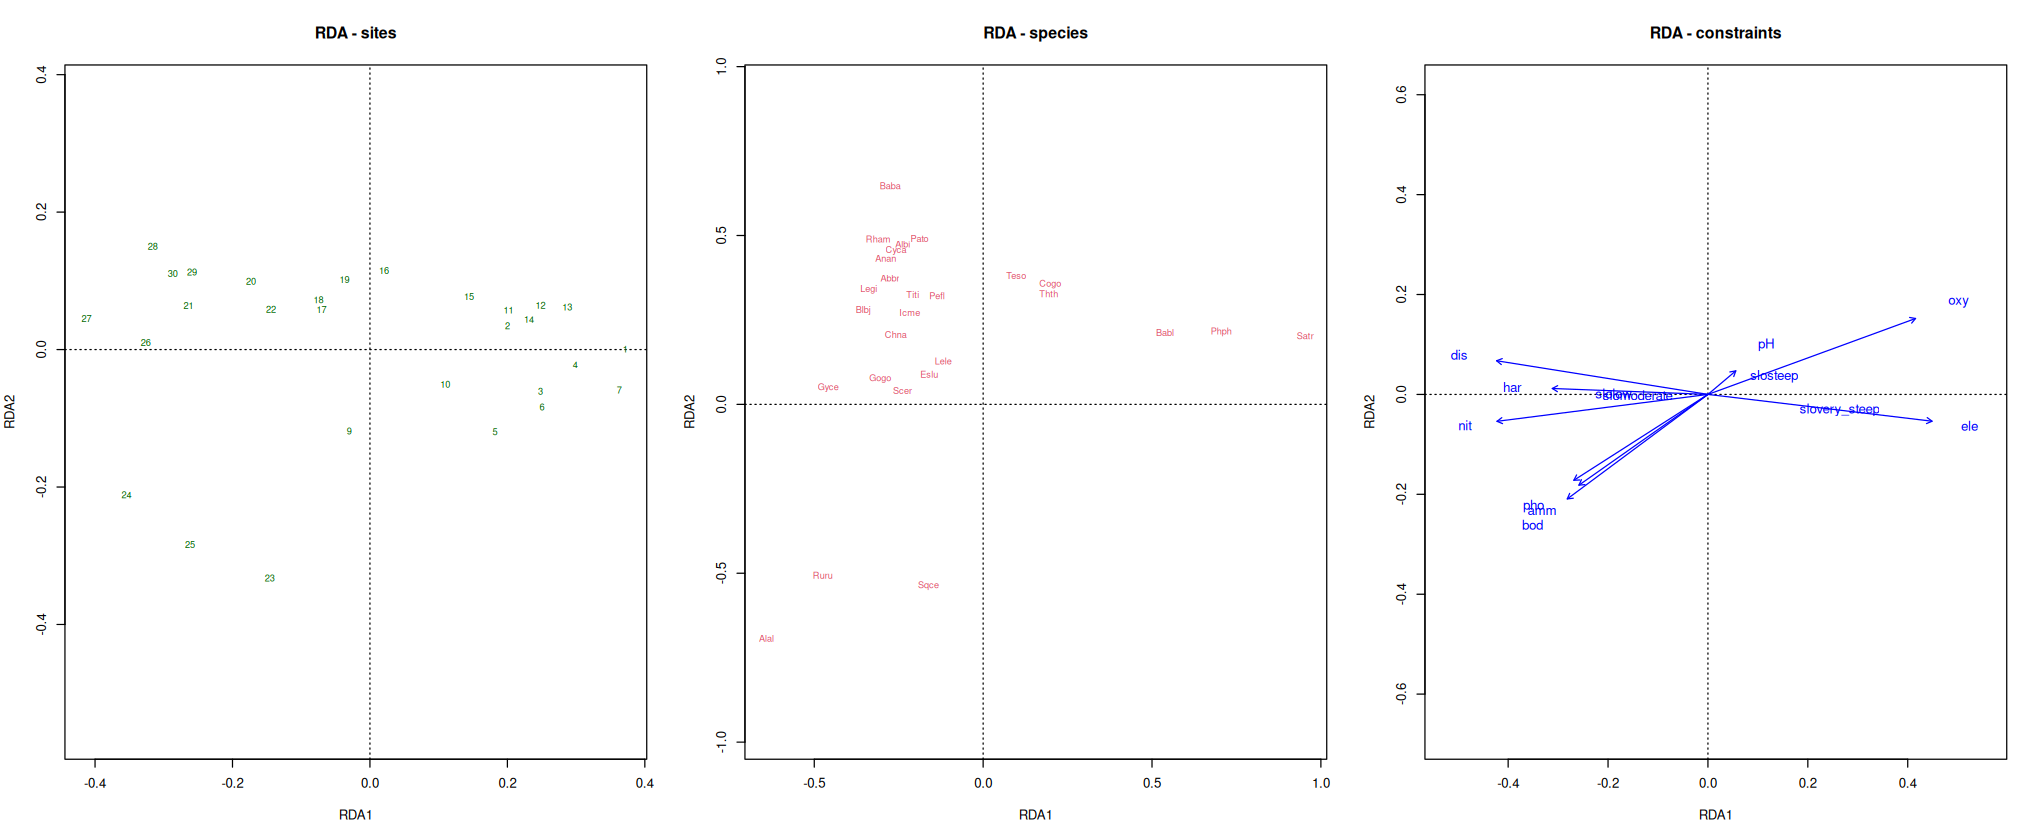

In [27]:
# Set plot size in Jupyter Notebook (17 x 7 inches)
options(repr.plot.width = 17, repr.plot.height = 7)

## Triplots of the rda results (lc site scores)
## Site scores as linear combinations of the environmental variables
par(mfrow=c(1,3))
plot(spe.rda, scaling = 1,   display = c("lc"), main = "RDA - sites")
plot(spe.rda, scaling = 1,   display = c("sp"), main = "RDA - species")
plot(spe.rda, scaling = 1,   display = c("cn"), main = "RDA - constraints")

## 2.5 Displaying RDA plot with sites, species and constraints on the same triplot

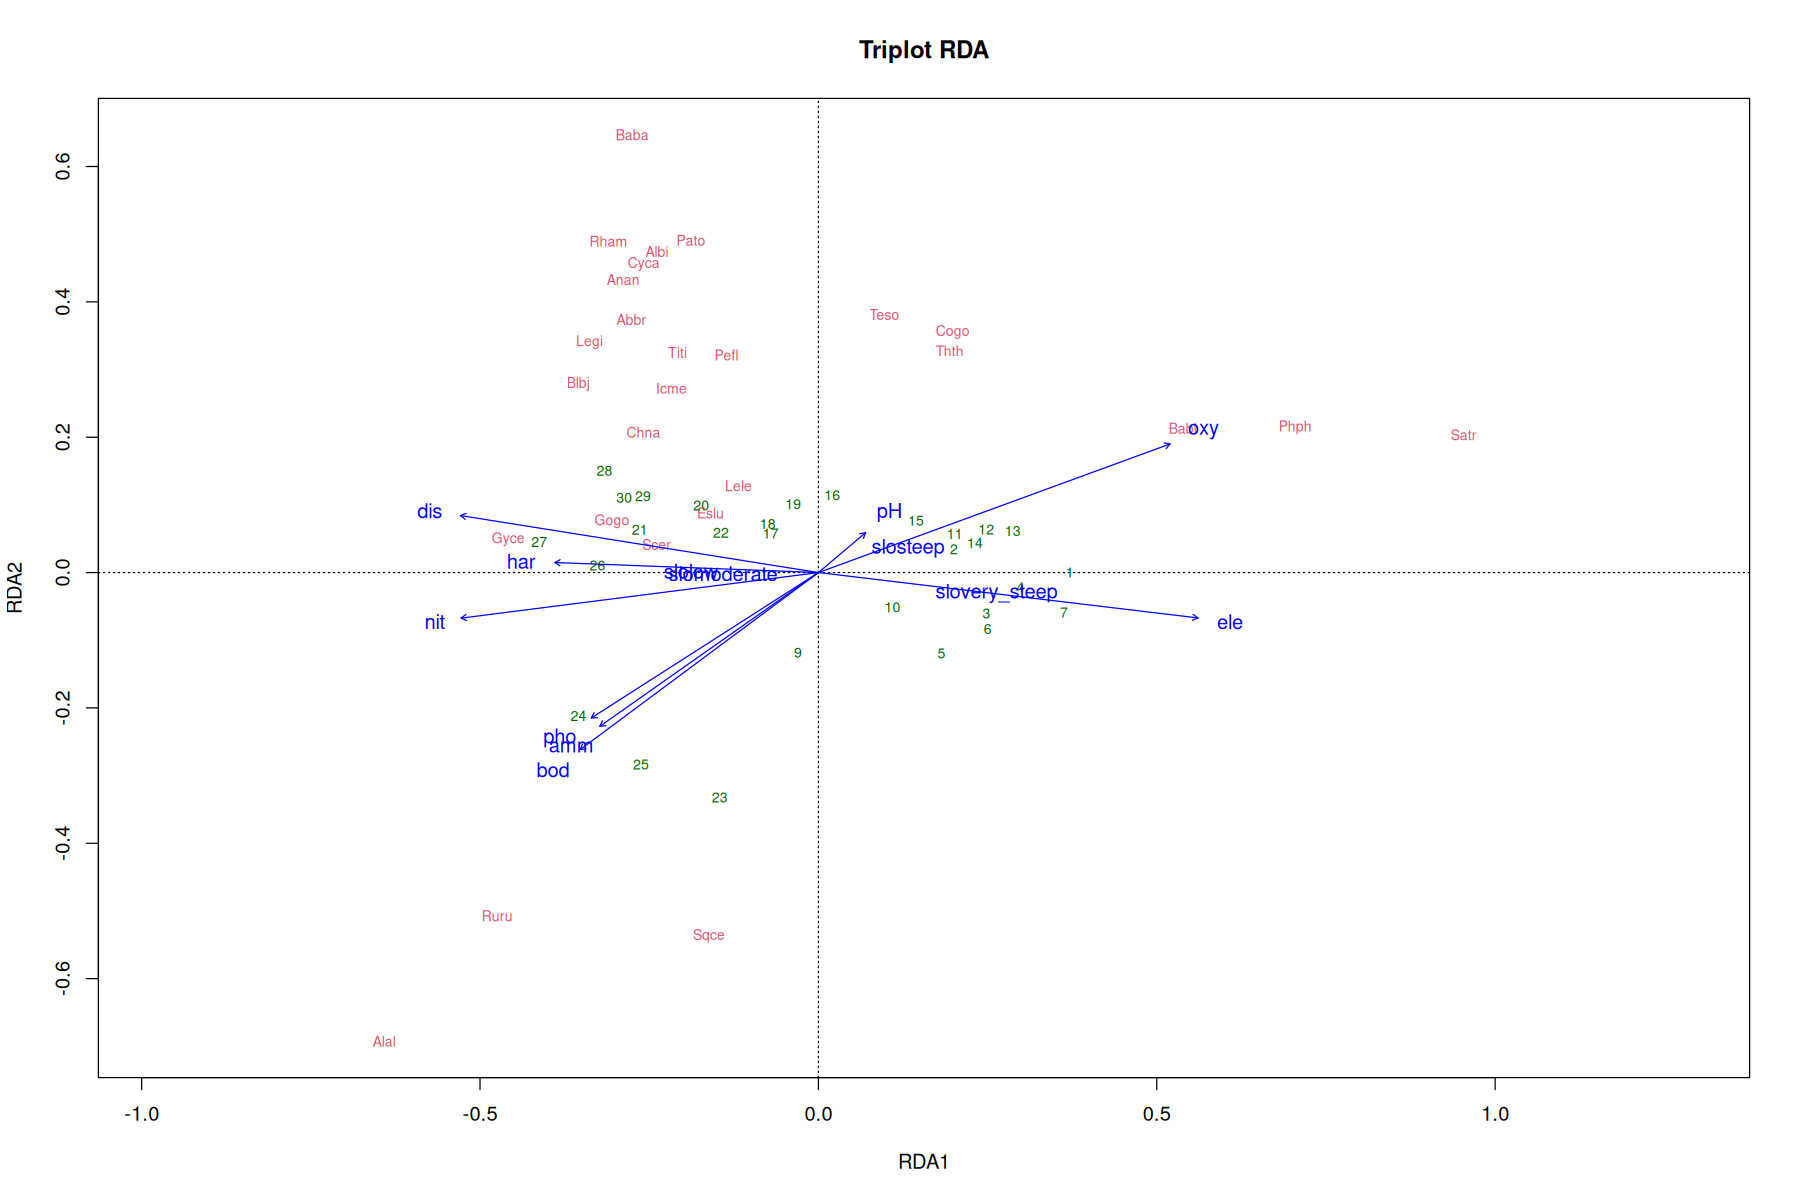

In [30]:
# Set plot size in Jupyter Notebook (17 x 12 inches)
options(repr.plot.width = 15, repr.plot.height = 10)
par(mfrow=c(1,1))
plot(spe.rda, scaling=1, disp=c("lc","sp","cn"), main="Triplot RDA")